# Data Movie

Learning Objective:
1. Data Cleaning and Preparation
2. Key Correlation Analysis Between Gross and Budget
3. Which 5 movie with the highest budget
4. Categorize movie scores into three groups (Low Score, Average Score, and High Score)






# Import Library


In [3]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import matplotlib.ticker as mticker

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read Data
df = pd.read_csv('movies.csv')

In [4]:
# See the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# 1. Cleaning Data and Preparation

In [5]:
# Remove Missing Values
df = df.dropna()

In [6]:
# Check Missing Values
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [7]:
# Check the data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Change data type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
# Drop any duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


# 2. Key Correlation Analysis Between Gross and Budget

Based on the heatmap we observe a positive correlation (0.74) between budget and gross revenue, indicating that films with larger production budgets tend to achieve higher gross earnings.

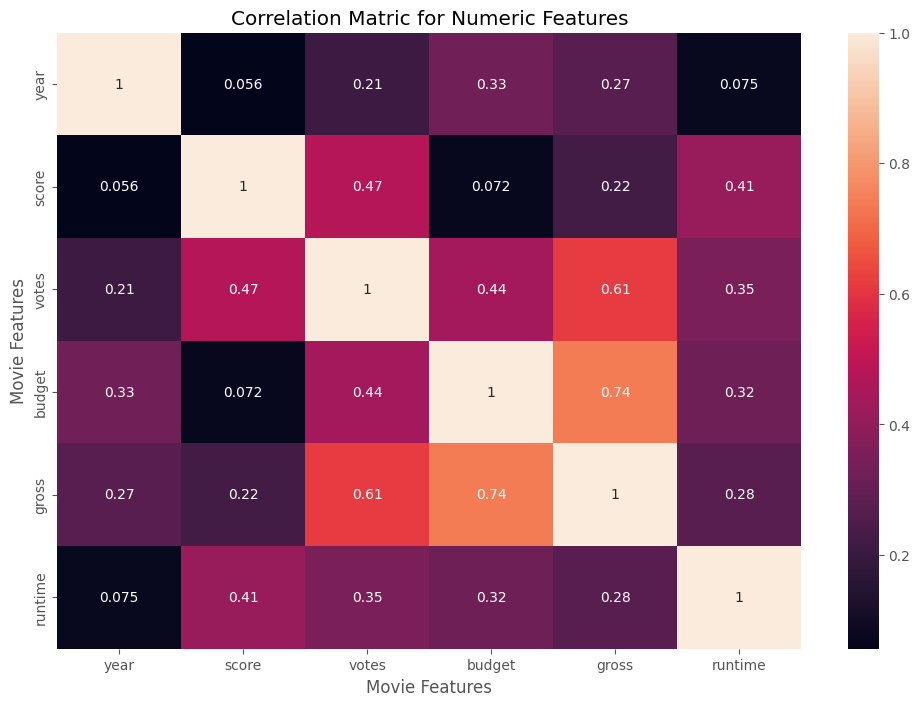

In [11]:
# See High Correlation between budget and gross
correlation_matrix = df.corr(method='pearson',numeric_only=True)

sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# 3. Which 5 movie with the highest budget


Of all the movies, the highest budget goes to Avengers: Endgame with a budget of over 350M, then the second goes to Avengers: Infinity War with a budget of over 300M and is accompanied by other top films.

In [12]:
# Make format budget for plot. Example: 500,000 to 500k
def format_budget(x, pos):
    if x >= 1e9:
        return f'{x*1e-9:.0f}B'
    elif x >= 1e6:
        return f'{x*1e-6:.0f}M'
    elif x >= 1e3:
        return f'{x*1e-3:.0f}K'
    else:
        return f'{x:.0f}'

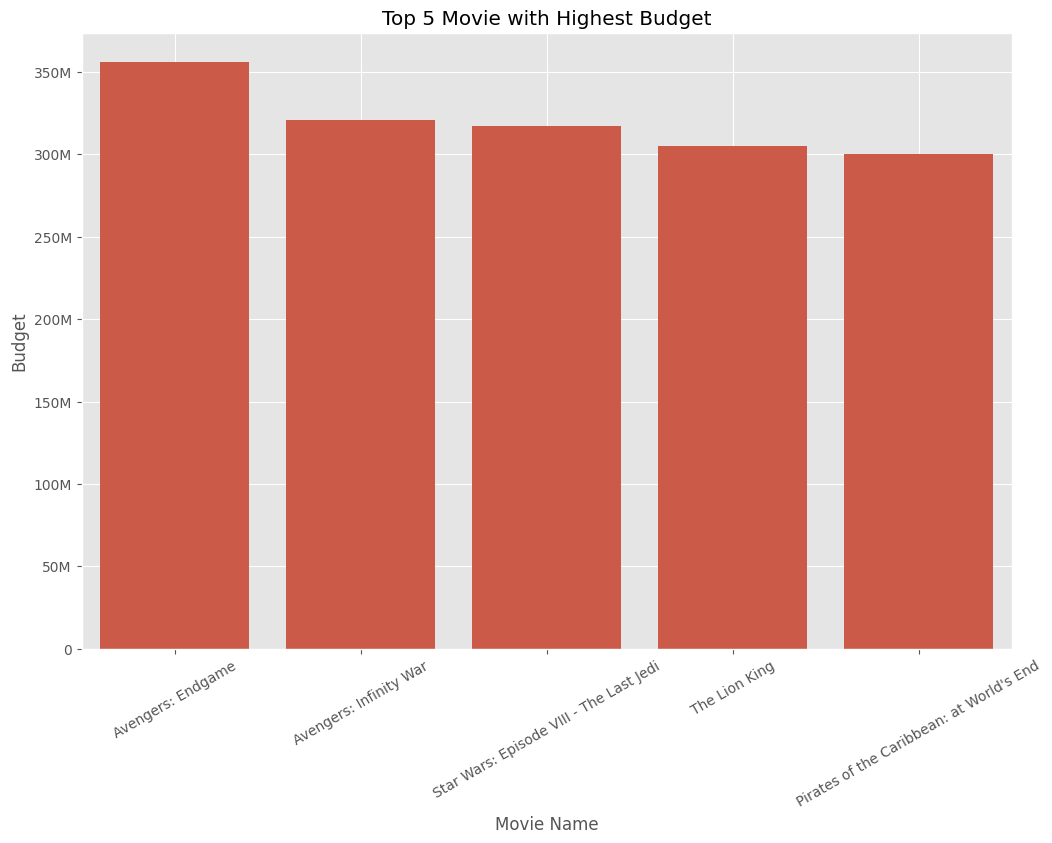

In [13]:
# Show 5 Top movie with highest budget
df_w = df['budget'].groupby(df['name']).sum().sort_values(ascending=False).reset_index()
y_formatter = mticker.FuncFormatter(format_budget)

sns.barplot(data=df_w.head(5), x='name', y='budget')
plt.title('Top 5 Movie with Highest Budget')
plt.xlabel('Movie Name')
plt.ylabel('Budget')
plt.grid(visible=True)
plt.xticks(rotation=30)
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.show()

# 4. Categorize movie scores into three groups (Low Score, Average Score, and High Score)

The Pie chart results show that most of the films fall into the Average Score category (around 46.1%), followed by High Score (around 46.0%), and the rest are Low Score (around 7.9%).

In [14]:
# Creata 3 categorize: Low Score, Average Score, High Score
def categorize(score):
    if score <= 5:
        return "Low Score"
    elif 6 <= score <= 7:
        return "Average Score"
    else:
        return "High Score"

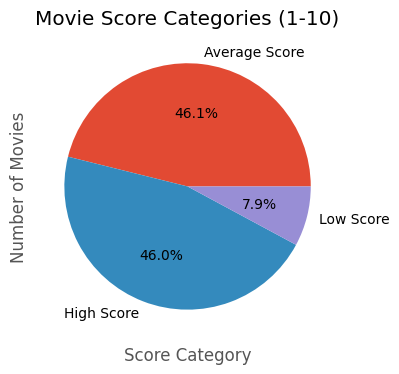

In [15]:
# Apply the function
df_categorize = df['score'].apply(categorize).value_counts()

# Show Bar Plot
plt.figure(figsize=(6,4))
plt.pie(
    df_categorize.values,
    labels = df_categorize.index,
    autopct='%1.1f%%')
plt.xlabel("Score Category")
plt.ylabel("Number of Movies")
plt.title("Movie Score Categories (1-10)")
plt.show()